In [20]:
# Shiman Ding, IEOR, 24104985
# shiman@berkeley.edu
# HW4: Parallelism
# MacBook Pro with 2 GHz Intel Core i5

In [6]:
"""
PACKAGE INSTALLATION: 
dask and dask.distributed:

conda install dask distributed -c conda-forge

profiling:
brew install graphviz  ## on a mac
sudo apt-get install graphviz ## on linux
pip install snakeviz graphviz

joblib:
conda install joblib
async HTTP

pip install aiohttp
ipyparallel:

conda install ipyparallel
ipcluster nbextension enable

"""

'\nPACKAGE INSTALLATION: \ndask and dask.distributed:\n\nconda install dask distributed -c conda-forge\n\nprofiling:\nbrew install graphviz  ## on a mac\nsudo apt-get install graphviz ## on linux\npip install snakeviz graphviz\n\njoblib:\nconda install joblib\nasync HTTP\n\npip install aiohttp\nipyparallel:\n\nconda install ipyparallel\nipcluster nbextension enable\n\n'

Q1. Use 3 methods to parallel computing and compare

In [7]:
from math import sqrt
from random import uniform
from time import time

In [8]:
# Monte Carlo Simulation to count the number of darts fall into a circle, then approximate PI
# Method 1: no Parallelism
def normal_simulation(number_of_darts):
    number_in_circle = 0.0

    start_time = time()
    for n in range(number_of_darts):
        x = uniform(0, 1)
        y = uniform(0, 1)
        if sqrt((x-0.5)**2 + (y-0.5)**2)<=0.5:
            number_in_circle += 1

    end_time = time()
    execute_time = end_time - start_time
    pi_approx1 = 4 * number_in_circle / number_of_darts

    print("Method 1: normal calculation without parallelism")
    print('Pi Approximation: ', pi_approx1)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return((execute_time, int(number_of_darts/execute_time)))

In [9]:
normal_simulation(200000)

Method 1: normal calculation without parallelism
Pi Approximation:  3.14232
Execution time:  0.2496030330657959
Number of darts:  200000
Darts thrown per second:  801272


(0.2496030330657959, 801272)

In [10]:
# define function for parallelism
def throw_dart(idx = 1):
    x = uniform(0, 1)
    y = uniform(0, 1)
    dart_in = 0
    if sqrt((x-0.5)**2 + (y-0.5)**2)<=0.5:
        dart_in = 1
    return(dart_in)


In [11]:
throw_dart()

1

In [12]:
# Method 2: multiprocessing to parallel computing

from multiprocessing import Pool 

def multiprocess(number_of_darts):
    pool = Pool(processes=4)
    start_time = time()
    g=pool.map(throw_dart, range(number_of_darts))
    end_time = time()
    execute_time = end_time - start_time
    pi_approx2 = 4 * sum(g) / number_of_darts
    del pool

    print("Method 2: parallel computing using MULTIPROCESSING.POOL")
    print('Pi Approximation: ', pi_approx2)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return(execute_time, int(number_of_darts/execute_time))

In [13]:
multiprocess(200000)

Method 2: parallel computing using MULTIPROCESSING.POOL
Pi Approximation:  3.14104
Execution time:  0.16172409057617188
Number of darts:  200000
Darts thrown per second:  1236674


(0.16172409057617188, 1236674)

In [14]:
# Method 3: dask to parallel computing
import numpy as np
import dask.array as da


def dask_parallel(number_of_darts):
    start_time = time()
    x = da.random.uniform(0, 1, size=number_of_darts, chunks=100)   # Cut into 1000 sized chunks
    y = da.random.uniform(0, 1, size=number_of_darts, chunks=100)   
    dart_in = (x-0.5)**2 + (y-0.5)**2 < 0.5**2
    end_time = time()
    execute_time = end_time - start_time
    pi_approx3 = 4 * sum(dart_in.compute()) / number_of_darts

    print("Method 3: parallel computing using DASK")
    print('Pi Approximation: ', pi_approx3)
    print('Execution time: ', execute_time)
    print('Number of darts: ', number_of_darts)
    print('Darts thrown per second: ', int(number_of_darts/execute_time))
    return(execute_time, int(number_of_darts/execute_time))

In [15]:
dask_parallel(200000)

Method 3: parallel computing using DASK
Pi Approximation:  3.14036
Execution time:  0.23270010948181152
Number of darts:  200000
Darts thrown per second:  859475


(0.23270010948181152, 859475)

In [16]:
lista = list()
lista.append(1)
lista

[1]

In [17]:
import numpy as np
darts_num = np.logspace(1,7,9)
darts_num = darts_num.astype(int)
Simple = list()
Multiprocessing= list()
Dask = list() 
# try different darts number and see how scaling affets parallel
for num in darts_num:
    Simple.append(normal_simulation(num))
    Multiprocessing.append(multiprocess(num))
    Dask.append(dask_parallel(num))

Method 1: normal calculation without parallelism
Pi Approximation:  2.8
Execution time:  3.0994415283203125e-05
Number of darts:  10
Darts thrown per second:  322638
Method 2: parallel computing using MULTIPROCESSING.POOL
Pi Approximation:  3.2
Execution time:  0.0041158199310302734
Number of darts:  10
Darts thrown per second:  2429
Method 3: parallel computing using DASK
Pi Approximation:  3.2
Execution time:  0.02239704132080078
Number of darts:  10
Darts thrown per second:  446
Method 1: normal calculation without parallelism
Pi Approximation:  3.42857142857
Execution time:  0.00022101402282714844
Number of darts:  56
Darts thrown per second:  253377
Method 2: parallel computing using MULTIPROCESSING.POOL
Pi Approximation:  3.28571428571
Execution time:  0.010866165161132812
Number of darts:  56
Darts thrown per second:  5153
Method 3: parallel computing using DASK
Pi Approximation:  3.21428571429
Execution time:  0.01647496223449707
Number of darts:  56
Darts thrown per second:  3

In [18]:
Simple_time = [x[0] for x in Simple]
Simple_rate = [x[1] for x in Simple]
multiprocess_time = [x[0] for x in Multiprocessing]
multiprocess_rate = [x[1] for x in Multiprocessing]
Dask_time = [x[0] for x in Dask]
Dask_rate = [x[1] for x in Dask]


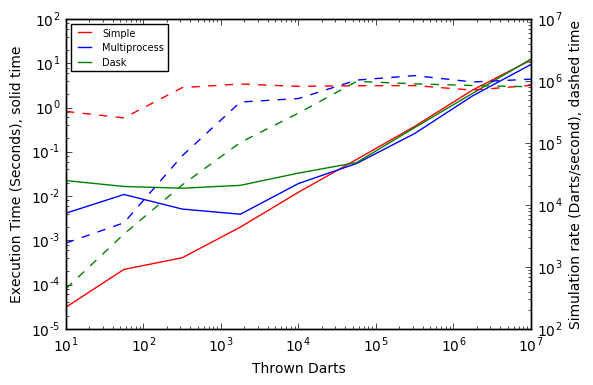

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
plt.yscale('log')
plt.xscale('log')
ax1.set_yscale("log") 
ax2.yaxis.tick_right() 
simple1 = ax1.plot(darts_num, Simple_time, color = 'red', 
         linestyle = '-', label = "Simple")
simple2 = ax2.plot(darts_num, Simple_rate, color = 'red', 
         linestyle = '--', label = "Simple")
multiprocess1 = ax1.plot(darts_num, multiprocess_time, color = 'blue', 
         linestyle = '-', label = "Multiprocess")
multiprocess2 = ax2.plot(darts_num, multiprocess_rate, color = 'blue', 
         linestyle = '--', label = "Multiprocess")
Dask1 = ax1.plot(darts_num, Dask_time, color = 'green', 
         linestyle = '-', label = "Dask")
Dask2 = ax2.plot(darts_num, Dask_rate, color = 'green', 
         linestyle = '--', label = "Dask")

ax1.minorticks_on()
ax1.set_ylim(10**(-5), 10**2)
ax1.set_ylabel('Execution Time (Seconds), solid time')
ax1.set_xlabel('Thrown Darts')
ax2.minorticks_on()
ax2.set_ylim(10**2, 10**7)
ax2.set_ylabel('Simulation rate (Darts/second), dashed time')
ax1.legend(prop={'size':7}, loc = 0)